<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_2_Course_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **week_1**

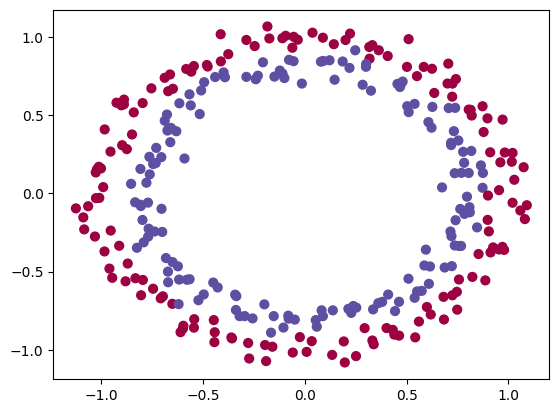

In [44]:
#you will see how different initializations lead to different results.
#well chosen of gradiant descent can lead to :
#1 Speed up the convergence of gradient descent
#2 Increase the odds of gradient descent converging to a lower training (and generalization) error

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

#define function to load datasets
def load_dataset():
  np.random.seed(1)
  train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
  np.random.seed(2)
  test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
  # Visualize the data
  plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
  train_X = train_X.T
  train_Y = train_Y.reshape((1, train_Y.shape[0]))
  test_X = test_X.T
  test_Y = test_Y.reshape((1, test_Y.shape[0]))
  return train_X, train_Y, test_X, test_Y

#call this function to load data
train_x,train_y,test_x,test_y =load_dataset()

In [45]:
# Neural Network model
# will use a 3-layer neural network
# we will use three initialization methodes
#1 zeros intialization,2 random intialization ,3 he initializations

#but first we need to build the model as previous course, three layers model  "this is fixed model not like the previous one where you can set any number of layer"
#we wiil build helper methodes (sigmoid, relu),forwrd porpagation,backword propagation, compute loss and update parameters
# we need predict function also
# we will need decision boundary functions too
def sigmoid(x):
  s =1/(1+np.exp(-x))
  return s

def relu(x):
  s =np.maximum(0,x)
  return s

def forward_propagation(x,parameters):
  w1 =parameters["w1"]
  b1 =parameters["b1"]
  w2 =parameters["w2"]
  b2 =parameters["b2"]
  w3 =parameters["w3"]
  b3 =parameters["b3"]

  z1 =np.dot(w1,x)+b1
  a1 =relu(z1)
  z2 =np.dot(w2,a1)+b2
  a2 =relu(z2)
  z3 =np.dot(w3,a2)+b3
  a3 =sigmoid(z3)
  cache =(z1,a1,w1,b1,z2,a2,w2,b2,z3,a3,w3,b3)
  return a3,cache

def backward_propagation(x,y,cache):
  m =x.shape[1]
  (z1,a1,w1,b1,z2,a2,w2,b2,z3,a3,w3,b3)=cache
  dz3 =1./m*(a3-y)
  dw3 =np.dot(dz3,a2.T)
  db3 =np.sum(dz3,axis=1,keepdims=True)

  da2 =np.dot(w3.T,dz3)
  dz2 =np.multiply(da2,np.int64(a2>0))
  dw2 =np.dot(dz2,a1.T)
  db2 =np.sum(dz2,axis =1,keepdims =True)

  da1 =np.dot(w2.T,dz2)
  dz1 =np.multiply(da1,np.int64(a1>0))
  dw1 =np.dot(dz1,x.T)
  db1 =np.sum(dz1,axis =1,keepdims=True)
  grads ={"dz3":dz3,"dw3":dw3,"db3":db3,
          "da2":da2,"dz2":dz2,"dw2":dw2,"db2":db2,
          "da1":da1,"dz1":dz1,"dw1":dw1,"db1":db1}
  return grads

def update_parameters(parameters,grads,learning_rate):
  L =len(parameters)//2
  for k in range(L):
    parameters["w"+str(k+1)] =parameters["w"+str(k+1)]- learning_rate * grads["dw"+str(k+1)]
    parameters["b"+str(k+1)] =parameters["b"+str(k+1)]- learning_rate * grads["db"+str(k+1)]

  return parameters

def compute_loss(a3,y):
  m =y.shape[1]
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)
  loss =1./m *np.nansum(logprobs)
  return loss


#now define full model
def model (x,y,learning_rate =0.01,num_iterations =15000,print_cost =True,initialization ="he"):
  grads ={}
  costs =[]
  m =x.shape[1]
  layers_dims =[x.shape[0],10,5,1]
  if initialization =="zeros":
    parameters =initialize_parameters_zeros(layers_dims) # these functions will be defined later
  elif initialization =="random": # this initialize the weights to large random values
    parameters =initialize_parameters_random(layers_dims)
  elif initialization =="he": # this initialize the weights to random values scaled according a paper by He
    parameters =initialize_parameters_he(layers_dims)
  for i in range(0,num_iterations):
    a3,cache =forward_propagation(x,parameters)
    cost =compute_loss(a3,y)
    grads =backward_propagation(x,y,cache)
    parameters =update_parameters(parameters,grads,learning_rate)
    if print_cost and i % 1000==0:
      print("cost after iterations {}: {}".format(i,cost))
      costs.append(cost)

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations per hunderd')
  plt.title('learning rate ='+str(learning_rate))
  plt.show()

  return parameters

# predict function
def predict(x,y,parameters):
  m =x.shape[1]
  p =np.zeros((1,m),dtype =int)
  a3,caches =forward_propagation(x,parameters)
  for  i in range(0,a3.shape[1]):
    if a3[0,i]>0.5 :
      p[0,i]=1
    else :
      p[0,i] =0
  print("accuracy : "+str(np.mean((p[0,:]==y[0,:]))))
  return p

#define decision boundary functions
def plot_decision_boundary(model,x,y):
  x_min,x_max =x[0,:].min() -1,x[0,:].max()+1
  y_min,y_max =x[1,:].min() -1,x[1,:].max()+1
  h =0.01
  xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  z =model(np.c_[xx.ravel(),yy.ravel()])
  z =z.reshape(xx.shape)
  plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(x[0,:],x[1,:],c=y,cmap=plt.cm.Spectral)
  plt.show()

def predict_dec(parameters,x):
  a3,cache =forward_propagation(x,parameters)
  predictions =(a3>0.5)
  return predictions


# there is two types of parameters to initialize on neural networks
#1 weights metrices (w1,w2,w3,...)
#2 bise vectors (b1,b2,b3....)

#


w1 =  [[0. 0. 0.]
 [0. 0. 0.]]
w2=  [[0. 0.]]
b1 [[0.]
 [0.]]
b2 [[0.]]
cost after iterations 0: 0.6931471805599453
cost after iterations 1000: 0.6931471805599453
cost after iterations 2000: 0.6931471805599453
cost after iterations 3000: 0.6931471805599453
cost after iterations 4000: 0.6931471805599453
cost after iterations 5000: 0.6931471805599453
cost after iterations 6000: 0.6931471805599453
cost after iterations 7000: 0.6931471805599453
cost after iterations 8000: 0.6931471805599453
cost after iterations 9000: 0.6931471805599453
cost after iterations 10000: 0.6931471805599455
cost after iterations 11000: 0.6931471805599453
cost after iterations 12000: 0.6931471805599453
cost after iterations 13000: 0.6931471805599453
cost after iterations 14000: 0.6931471805599453


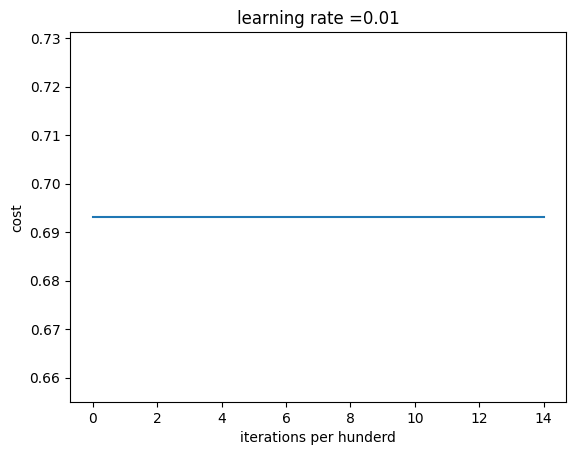

on training set
accuracy : 0.5
on test set
accuracy : 0.5
predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


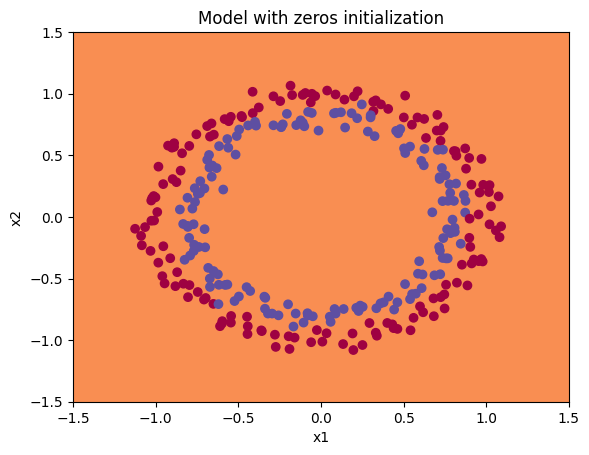

In [46]:
# initialize parameters to zeros
def initialize_parameters_zeros(layers_dims):
  parameters ={}
  L =len(layers_dims)
  for l in range(1,L):
    parameters['w'+str(l)] =np.zeros((layers_dims[l],layers_dims[l-1]))
    parameters['b'+str(l)] =np.zeros((layers_dims[l],1))
  return parameters

#let's check this function
parameters =initialize_parameters_zeros([3,2,1])
print("w1 = ",parameters["w1"])
print("w2= ", parameters["w2"])
print("b1",parameters["b1"])
print("b2",parameters["b2"])

#check model with this initialized values
parameters = model(train_x,train_y,initialization ="zeros")
print ("on training set")
predictions_train =predict(train_x,train_y,parameters)
print("on test set")
predictions_test =predict(test_x,test_y,parameters)

#The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing.

#let's check results of predicted values
print("predictions_train =",str(predictions_train))
print("predictions_train =",str(predictions_test))


plt.title("Model with zeros initialization")
axes =plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x :predict_dec(parameters,x.T),train_x,train_y)
#The model is predicting 0 for every example.
#In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing
#and you might as well be training a neural network with n(l) =1 for every layer, and the network is no more powerful than a linear classifier such as logistic regression.


w1 =  [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
w2 =  [[-0.82741481 -6.27000677]]
b1 =  [[0.]
 [0.]]
b2 =  [[0.]]
cost after iterations 0: inf


<ipython-input-45-9abe4b7e3486>:66: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)
<ipython-input-45-9abe4b7e3486>:66: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)


cost after iterations 1000: 0.6247924745506072
cost after iterations 2000: 0.5980258056061102
cost after iterations 3000: 0.5637539062842213
cost after iterations 4000: 0.5501256393526495
cost after iterations 5000: 0.5443826306793814
cost after iterations 6000: 0.5373895855049121
cost after iterations 7000: 0.47157999220550006
cost after iterations 8000: 0.39770475516243037
cost after iterations 9000: 0.3934560146692851
cost after iterations 10000: 0.3920227137490125
cost after iterations 11000: 0.38913700035966736
cost after iterations 12000: 0.3861358766546214
cost after iterations 13000: 0.38497629552893475
cost after iterations 14000: 0.38276694641706693


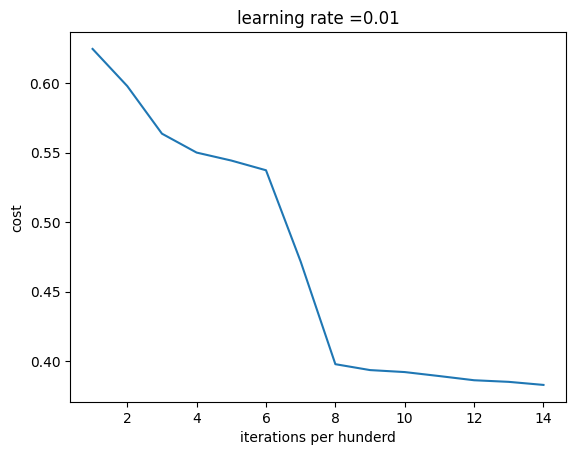

on the training set :
accuracy : 0.83
on test set : 
accuracy : 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


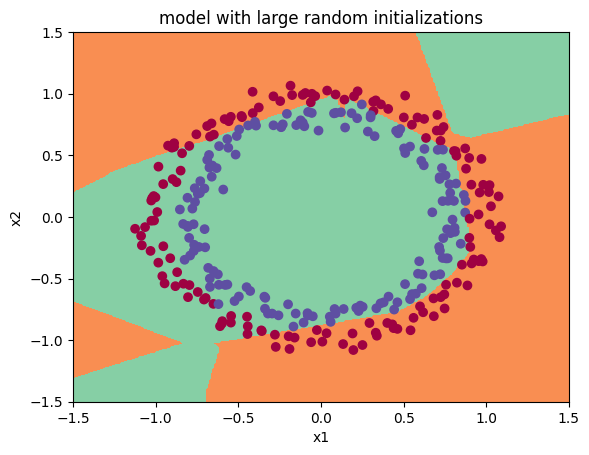

In [47]:
#Random initialization
#to break symmetyr let's iniitialize weights randomly , each nueron can leanr a difernet functions of it's inputs

def initialize_parameters_random(layers_dims):
  np.random.seed(3)
  parameters ={}
  L =len(layers_dims)
  for l in range(1,L):
    parameters['w'+str(l)] =np.random.randn(layers_dims[l],layers_dims[l-1])*10
    parameters['b'+str(l)] =np.zeros((layers_dims[l],1))
  return parameters

#let's check this functions
parameters =initialize_parameters_random([3,2,1])
print('w1 = ',parameters["w1"])
print('w2 = ',parameters["w2"])
print('b1 = ',parameters["b1"])
print('b2 = ',parameters["b2"])

parameters =model(train_x,train_y,initialization ="random")
print("on the training set :")
predictions_train =predict(train_x,train_y,parameters)
print("on test set : ")
predictions_test =predict(test_x,test_y,parameters)

# it looks like you have broken symmetry, and this gives better results. than before. The model is no longer outputting all 0s

print(predictions_train)
print(predictions_test)

#let's plot decision boundary
plt.title("model with large random initializations")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x : predict_dec(parameters,x.T),train_x,train_y)
#Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
#If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

#**In summary**: - Initializing weights to very large random values does not work well. - Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part!


w1= [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
w2= [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b1= [[0.]
 [0.]
 [0.]
 [0.]]
b2= [[0.]]
cost after iterations 0: 0.8830537463419761
cost after iterations 1000: 0.6879825919728063
cost after iterations 2000: 0.6751286264523371
cost after iterations 3000: 0.6526117768893807
cost after iterations 4000: 0.6082958970572938
cost after iterations 5000: 0.5304944491717495
cost after iterations 6000: 0.4138645817071795
cost after iterations 7000: 0.31178034648444414
cost after iterations 8000: 0.23696215330322565
cost after iterations 9000: 0.18597287209206836
cost after iterations 10000: 0.15015556280371808
cost after iterations 11000: 0.12325079292273551
cost after iterations 12000: 0.09917746546525935
cost after iterations 13000: 0.08457055954024276
cost after iterations 14000: 0.07357895962677363


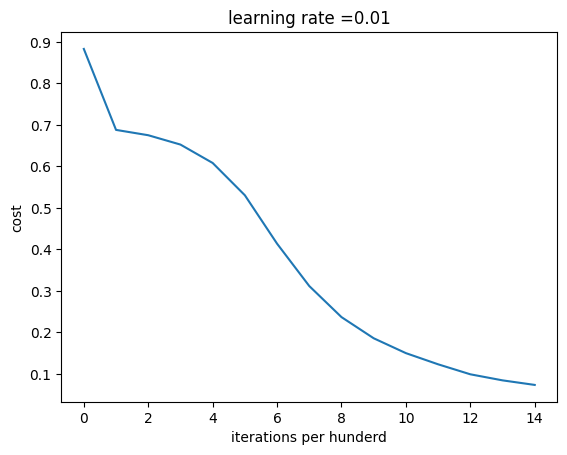

on the train set 
accuracy : 0.9933333333333333
on the test set
accuracy : 0.96


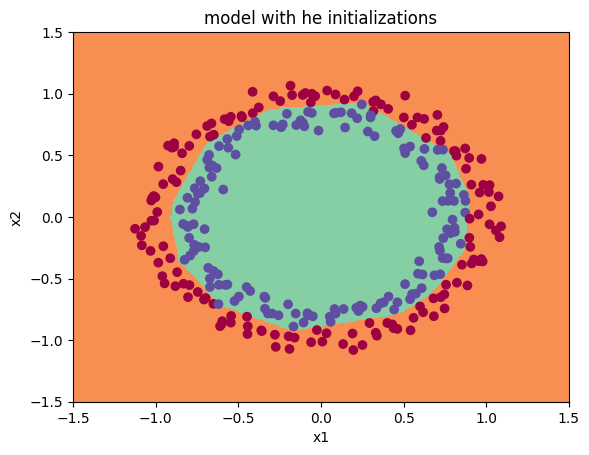

In [48]:
#He initialization
#If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights w[l] sqrt(1./layers_dims[l-1])
#where He initialization would use sqrt(2./layers_dims[l-1]).)

def initialize_parameters_he(layers_dims):
  np.random.seed(3)
  parameters ={}
  L =len(layers_dims)-1
  import math
  for l in range(1,L+1):
    parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2./layers_dims[l-1])
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))*math.sqrt(2./layers_dims[l-1])
  return parameters

#let's chechk this function
parameters  =initialize_parameters_he([2,4,1])
print("w1= "+str(parameters["w1"]))
print("w2= "+str(parameters["w2"]))
print("b1= "+str(parameters["b1"]))
print("b2= "+str(parameters["b2"]))

parameters =model(train_x,train_y,initialization ='he')
print("on the train set ")
predictions_train =predict(train_x,train_y,parameters)
print("on the test set")
predictions_test =predict(test_x,test_y,parameters)


#let's visualize our datasets
plt.title("model with he initializations")
axes= plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x :predict_dec(parameters,x.T),train_x,train_y)


Mounted at /content/drive


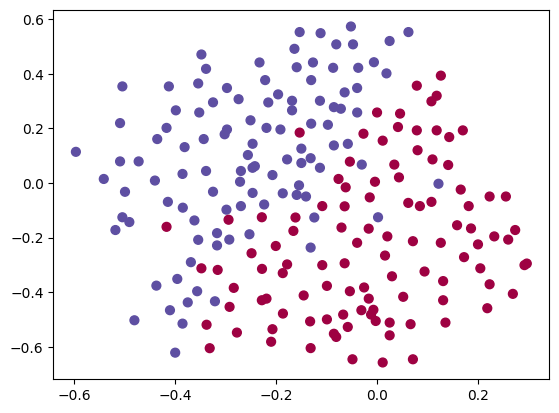

In [49]:
#regualrization
#Deep Learning models have so much flexibility and capacity that overfitting can be a serious problem, if the training dataset is not big enough.Deep Learning models have so much flexibility and capacity that overfitting can be a serious problem, if the training dataset is not big enough.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
#let's load datasets
def load_2D_datasets():
  data =scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/data(1).mat')
  train_x = data['X'].T
  train_y= data['y'].T
  test_x = data['Xval'].T
  test_y = data['yval'].T
  plt.scatter(train_x[0, :], train_x[1, :], c=train_y, s=40, cmap=plt.cm.Spectral);
  return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_2D_datasets()
#Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.
#f the dot is blue, it means the French player managed to hit the ball with his/her head
#f the dot is red, it means the other team's player hit the ball with their head

#Your goal: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.



Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724204
Cost after iteration 20000: 0.1385164242325349


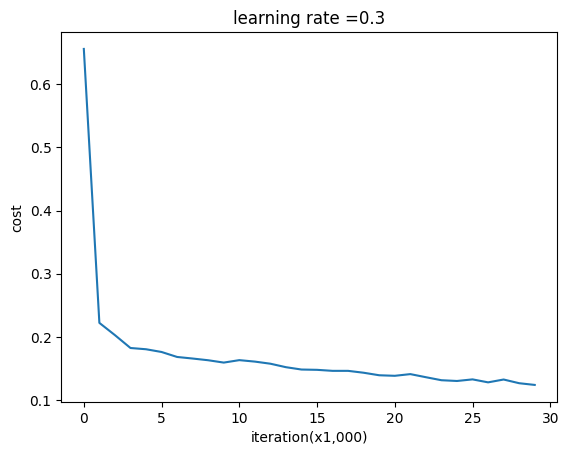

on the training set
accuracy : 0.9478672985781991
on the test set 
accuracy : 0.915


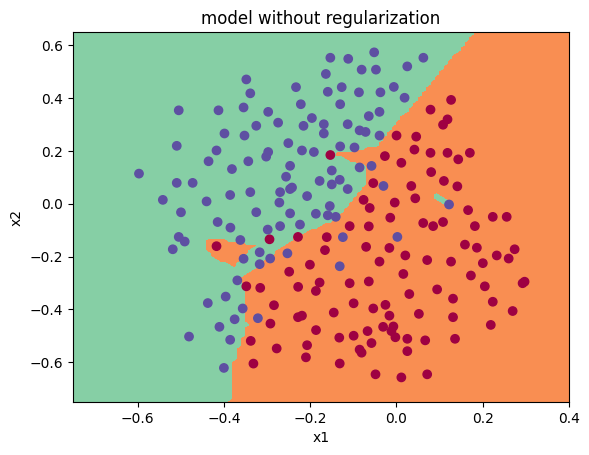

In [50]:
#Non-regularized model
#we will two types of modes regularized mode and dropout mode
# build model function that use all previuos functions

# we will build first initiaize parameters function  with random type, but with small values so don't multiply weights by 10
def initialize_parameters (layer_dimes):
  np.random.seed(3)
  parameters ={}
  L =len(layer_dimes)
  for l in range(1,L):
    parameters['w'+str(l)] =np.random.randn(layer_dimes[l],layer_dimes[l-1]) / np.sqrt(layer_dimes[l-1])
    parameters['b'+str(l)] =np.zeros((layer_dimes[l],1))
  return parameters

# we need another function to use it with dropout mode


def model (x,y,learning_rate =0.3,num_iterations =30000,print_cost =True,lambd =0,keep_probs = 1.0):
  grads ={}
  costs =[]
  m =x.shape[1]
  layer_dimes =[x.shape[0],20,3,1] # 3 layers model with two layers hidden
  parameters = initialize_parameters(layer_dimes)
  for i in range(0,num_iterations):
    if keep_probs == 1:
      a3, cache = forward_propagation(x, parameters)
    elif keep_probs < 1:
      a3, cache = forward_propagation_with_dropout(x, parameters, keep_probs) #theses function will be defined later

    if lambd ==0:
      cost =compute_loss(a3,y)
    else :
      cost =compute_cost_with_regularzation(a3,y,parameters,lambd) #function will defined later


    if lambd ==0  and keep_probs ==1 :
      grads =backward_propagation(x,y,cache)
    elif lambd != 0:
      grads =back_propagation_with_regularization(x,y,cache,lambd)
    elif keep_probs < 1 :
      grads =backward_propagation_with_dropout(x,y,cache,keep_probs)

    parameters =update_parameters(parameters,grads,learning_rate)

    if print_cost and i % 10000 == 0:
      print("Cost after iteration {}: {}".format(i, cost))
    if print_cost and i % 1000 == 0:
      costs.append(cost)

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iteration(x1,000)')
  plt.title("learning rate ="+str(learning_rate))
  plt.show()

  return parameters



#let's checl model without regularization
parameters =model(train_x,train_y)
print("on the training set")
predictions_train=predict(train_x,train_y,parameters)
print("on the test set ")
predictions_test =predict(test_x,test_y,parameters)

#The train accuracy is 94.8% while the test accuracy is 91.5%. This is the baseline model (you will observe the impact of regularization on this model).
plt.title("model without regularization")
axes =plt.gca()
axes.set_xlim([-.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters,x.T),train_x,train_y)


cost : 1.7864859451590758
dw1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dw2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dw3 = 
[[-1.77691347 -0.11832879 -0.09397446]]

Results after regularizations
Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


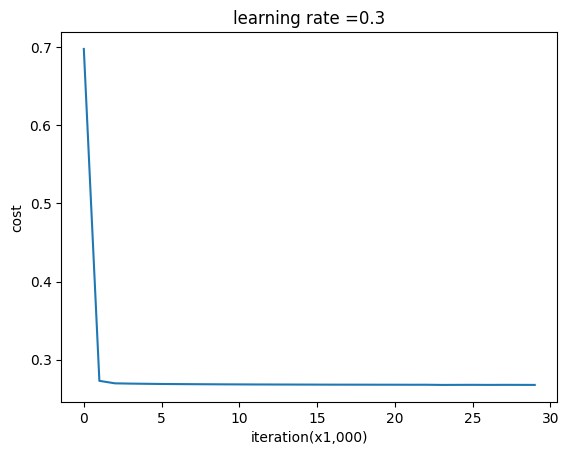

on the training set 
accuracy : 0.9383886255924171
on the test set
accuracy : 0.93


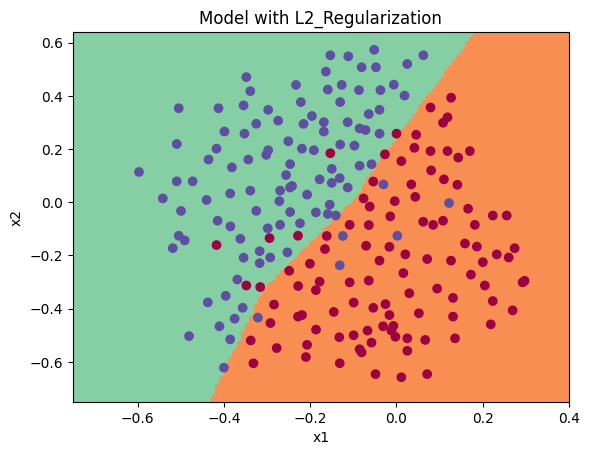

In [51]:
#first mode of regularization,"l2 regulariation"
def compute_cost_with_regularzation(A3,y,parameters,lambd):
  m =y.shape[1]
  w1=parameters["w1"]
  w2=parameters["w2"]
  w3=parameters["w3"]
  cross_entropy_cost =compute_loss(A3,y) #traditional cost
  l2_regularization_cost =lambd/(2*m)*(np.sum(np.square(w1))+np.sum(np.square(w2))+np.sum(np.square(w3)))
  cost  =cross_entropy_cost + l2_regularization_cost
  return cost

#let's  check this function
np.random.seed(1)
y = np.array([[1, 1, 0, 1, 0]])
w1 = np.random.randn(2, 3)
b1 = np.random.randn(2, 1)
w2 = np.random.randn(3, 2)
b2 = np.random.randn(3, 1)
w3 = np.random.randn(1, 3)
b3 = np.random.randn(1, 1)
parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2, "w3": w3, "b3": b3}
a3 = np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]])
cost =compute_cost_with_regularzation(a3,y,parameters,lambd =0.1)
print("cost : "+str(cost))

#because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost
def back_propagation_with_regularization(x,y,cache,lambd):
  m =x.shape[1]
  (z1,A1,w1,b1,z2,A2,w2,b2,z3,A3,w3,b3) =cache
  dz3 = A3 - y
  dw3 =1./m *np.dot(dz3,A2.T) + (lambd/m)*w3
  db3 = 1./m * np.sum(dz3, axis=1, keepdims = True)
  dA2 = np.dot(w3.T, dz3)
  dz2 = np.multiply(dA2, np.int64(A2 > 0))
  dw2 = 1./m * np.dot(dz2, A1.T) + (lambd/m)*w2
  db2 = 1./m * np.sum(dz2, axis=1, keepdims = True)
  dA1 = np.dot(w2.T, dz2)
  dz1 = np.multiply(dA1, np.int64(A1 > 0))
  dw1 = 1./m * np.dot(dz1, x.T) + (lambd/m)*w1
  db1 = 1./m * np.sum(dz1, axis=1, keepdims = True)
  gradients = {"dz3": dz3, "dw3": dw3, "db3": db3,"dA2": dA2,
                 "dz2": dz2, "dw2": dw2, "db2": db2, "dA1": dA1,
                 "dz1": dz1, "dw1": dw1, "db1": db1}
  return gradients

#check function of gradient
np.random.seed(1)
x = np.random.randn(3, 5)
y = np.array([[1, 1, 0, 1, 0]])
cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],[-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
         np.array([[ 0.        ,  3.32524635,  2.13994541,  2.60700654,  0.        ],[ 0.        ,  4.1600994 ,  0.79051021,  1.46493512,  0.        ]]),
         np.array([[-1.09989127, -0.17242821, -0.87785842],[ 0.04221375,  0.58281521, -1.10061918]]),
         np.array([[ 1.14472371],[ 0.90159072]]),
         np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],[-0.69166075, -3.47645987, -2.25194702, -2.65416996, -0.69166075],[-0.39675353, -4.62285846, -2.61101729, -3.22874921, -0.39675353]]),
         np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
         np.array([[ 0.50249434,  0.90085595],[-0.68372786, -0.12289023],[-0.93576943, -0.26788808]]),
         np.array([[ 0.53035547],[-0.69166075],[-0.39675353]]),
         np.array([[-0.3771104 , -4.10060224, -1.60539468, -2.18416951, -0.3771104 ]]),
         np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]]),
         np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
         np.array([[-0.0126646]]))

grads =back_propagation_with_regularization(x,y,cache,lambd=0.7)
print("dw1 = \n"+ str(grads["dw1"]))
print("dw2 = \n"+ str(grads["dw2"]))
print("dw3 = \n"+ str(grads["dw3"]))

# let's apply first mode "l2 regularization (inverted regularization)" on the model

print("\nResults after regularizations")
parameters =model(train_x,train_y,lambd = 0.7 )
print("on the training set ")
predictions_train = predict(train_x,train_y,parameters)
print("on the test set")
predictions_test =predict(test_x,test_y,parameters)
#he test set accuracy increased to 93%. You have saved the French football team!

#plot decision boundary
plt.title("Model with L2_Regularization")
axes =plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.64])
plot_decision_boundary(lambda x:predict_dec(parameters,x.T),train_x,train_y)
#The value of is a hyperparameter that you can tune using a dev set.
#L2 regularization makes your decision boundary smoother. If is too large, it is also possible to "oversmooth", resulting in a model with high bias.
#L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights


A3 =[[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]

 back_propagation with dropout check
dA1 =
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 =
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
Cost after iteration 0: 0.6543912405149825


<ipython-input-45-9abe4b7e3486>:66: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)
<ipython-input-45-9abe4b7e3486>:66: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),y)+np.multiply(-np.log(1-a3),1-y)


Cost after iteration 10000: 0.14682609493991045
Cost after iteration 20000: 0.19901898954819303


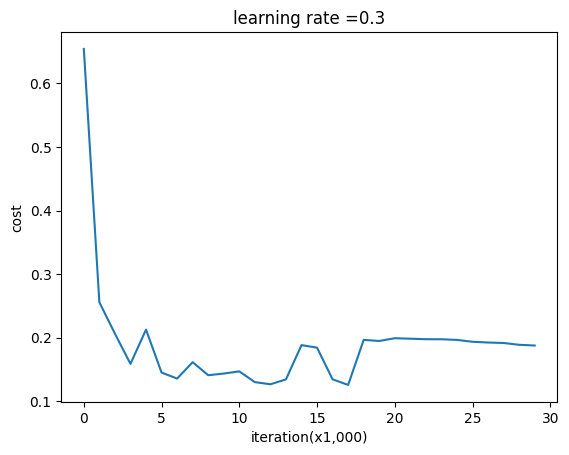

on training set :
accuracy : 0.933649289099526
on the test set
accuracy : 0.925


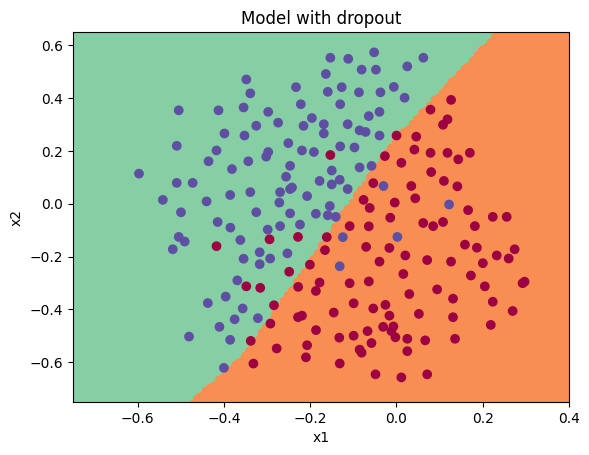

In [52]:
#second mode of regularization (dropout)
# dropout is a widely used regularization technique that is specific to deep learning. It randomly shuts down some neurons in each iteration
#The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration
#The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.

#def forward propagation with dropout
def forward_propagation_with_dropout(x,parameters,keep_probs =0.5):
  np.random.seed(1)
  w1 =parameters["w1"]
  b1 =parameters["b1"]
  w2 =parameters["w2"]
  b2 =parameters["b2"]
  w3 =parameters["w3"]
  b3 =parameters["b3"]

  z1 =np.dot(w1,x)+b1
  A1 =relu(z1)
  D1 =np.random.rand(A1.shape[0],A1.shape[1])
  D1 =(D1 <keep_probs).astype(int)
  A1 =A1*D1
  A1 =A1/keep_probs
  z2=np.dot(w2,A1)+b2
  A2 =relu(z2)
  D2 =np.random.rand(A2.shape[0],A2.shape[1])
  D2 =(D2 < keep_probs)
  A2 =A2*D2
  A2 =A2/keep_probs
  z3 =np.dot(w3,A2)+b3
  A3 =sigmoid(z3)
  cache=(z1,D1,A1,w1,b1,z2,D2,A2,w2,b2,z3,A3,w3,b3)
  return A3,cache

#let's chceck this function
np.random.seed(1)
x =np.random.randn(3,5)
w1=np.random.randn(2,3)
b1=np.random.randn(2,1)
w2=np.random.randn(3,2)
b2=np.random.randn(3,1)
w3=np.random.randn(1,3)
b3=np.random.randn(1,1)
parameters ={"w1":w1,"b1":b1,"w2":w2,"b2":b2,"w3":w3,"b3":b3}
A3,cache =forward_propagation_with_dropout(x,parameters,keep_probs =0.7)
print("A3 ="+str(A3))


#implemnet backpropagation with dropout
def backward_propagation_with_dropout(x,y,cache ,keep_probs =0.5):
  m =x.shape[1]
  (z1, D1, A1, w1, b1, z2, D2, A2, w2, b2, z3, A3, w3, b3) = cache
  dz3 =A3-y
  dw3 =1./m * np.dot(dz3,A2.T)
  db3 =1./m * np.sum(dz3,axis=1,keepdims=True)
  dA2 =np.dot(w3.T,dz3)
  dA2 =dA2*D2
  dA2 =dA2/keep_probs

  dz2 =np.multiply(dA2,np.int64(A2 > 0))
  dw2 =1./m * np.dot(dz3,A1.T)
  db2 =1./m * np.sum(dz2,axis=1,keepdims=True)
  dA1 =np.dot(w2.T,dz2)
  dA1 =dA1*D1
  dA1 =dA1/keep_probs
  dz1 =np.multiply(dA1,np.int64(A1>0))
  dw1 =1./m * np.dot(dz1,x.T)
  db1 =1./m * np.sum(dz1,axis =1,keepdims =True)
  gradients  ={"dz3":dz3,"dw3":dw3,"db3":db3,"dA2":dA2,
               "dz2":dz2,"dw2":dw2,"db2":db2,"dA1":dA1,
               "dz1":dz1,"dw1":dw1,"db1":db1}
  return gradients

#let's check the backe propagation with dropout
np.random.seed(1)
x =np.random.randn(3,5)
y =np.array([[1,1,0,1,0]])
cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],[-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
         np.array([[ True, False,  True,  True,  True],[ True,  True,  True,  True, False]], dtype=bool),
         np.array([[ 0.        ,  0.        ,  4.27989081,  5.21401307,  0.        ],[ 0.        ,  8.32019881,  1.58102041,  2.92987024,  0.        ]]),
         np.array([[-1.09989127, -0.17242821, -0.87785842],[ 0.04221375,  0.58281521, -1.10061918]]),
         np.array([[ 1.14472371],[ 0.90159072]]),
         np.array([[ 0.53035547,  8.02565606,  4.10524802,  5.78975856,  0.53035547],[-0.69166075, -1.71413186, -3.81223329, -4.61667916, -0.69166075],[-0.39675353, -2.62563561, -4.82528105, -6.0607449 , -0.39675353]]),
         np.array([[ True, False,  True, False,  True],[False,  True, False,  True,  True],[False, False,  True, False, False]], dtype=bool),
         np.array([[ 1.06071093,  0.        ,  8.21049603,  0.        ,  1.06071093],[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
         np.array([[ 0.50249434,  0.90085595],[-0.68372786, -0.12289023],[-0.93576943, -0.26788808]]),
         np.array([[ 0.53035547],[-0.69166075],[-0.39675353]]),
         np.array([[-0.7415562 , -0.0126646 , -5.65469333, -0.0126646 , -0.7415562 ]]),
         np.array([[ 0.32266394,  0.49683389,  0.00348883,  0.49683389,  0.32266394]]),
         np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
         np.array([[-0.0126646]]))

print("\n back_propagation with dropout check")
gradients  =backward_propagation_with_dropout(x,y,cache,keep_probs =0.8)
print("dA1 =\n"+str(gradients["dA1"]))
print("dA2 =\n"+str(gradients["dA2"]))


#let's run  model with dropout mode
parameters =model(train_x,train_y,keep_probs = 0.86 ,learning_rate =0.3)
print("on training set :")
predictions_train=predict(train_x,train_y,parameters)
print("on the test set")
predictions_test =predict(test_x,test_y,parameters)

#plot decision boundary
plt.title("Model with dropout")
axes =plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x : predict_dec(parameters,x.T),train_x,train_y)

#Dropout works great! The test accuracy has increased again (to 95%)! Your model is not overfitting the training set and does a great job on the test set. The French football team will be forever grateful to you!
#A common mistake when using dropout is to use it both in training and testing. You should use dropout (randomly eliminate nodes) only in training.



In [53]:
#gradient checking
# gradient checking i a test : that helps you to make sure that implemnetation of back prop is corect
# to build uo gradient checking  you need first to know how numericaly aproximate computations of gradinet , then implement gradient checking
#Give me a proof that your backpropagation is actually working!" To give this reassurance, you are going to use "gradient checking".
import numpy as np
def forward_propagation(x,theta):
  j =np.dot(theta,x)
  return j

#let's chech this function
x,theta  =2,4
j =forward_propagation(x,theta)
print("j = "+str(j))

def backward_propagation (x,theta):
  # this backe propagation id built based on previuos equation of forward propagation
  dtheta =x
  return dtheta

#let's check this backward propagation function
x,theta =2,4
dtheta =backward_propagation(x,theta)
print("dtheta ="+str(dtheta))

# let's implement gradient check
#first : implement gradient approximation
# look at explaination on slides
def gradient_check(x,theta,epsilon =1e-7):
  thetaplus =theta+epsilon
  thetaminus=theta-epsilon
  j_plus    =np.dot(thetaplus,x)
  j_minus   =np.dot(thetaminus,x)
  gradapprox=(j_plus - j_minus)/(2*epsilon)

  grad =x # which is we caculated on backward propagation as dtheta
  # start code here
  numerator =np.linalg.norm(gradapprox-grad)
  denomirator= np.linalg.norm(gradapprox)+np.linalg.norm(grad)
  difference =numerator/denomirator
  if difference <1e-7 :
    print("the gradient is correct")
  else :
    print("the gradient is wrong")

  return difference

#let's check this function
x,theta  =2,4
difference = gradient_check(x,theta)
print("differnce"+str(difference))

#in the more general case, your cost function J has more than a single 1D input. When you are training a neural network

def forward_propagation_n(x,y,parameters):
  #three layers and the last one contain sigmoid function where others contain relu
  m =x.shape[1]
  w1=parameters["w1"]
  b1=parameters["b1"]
  w2=parameters["w2"]
  b2=parameters["b2"]
  w3=parameters["w3"]
  b3=parameters["b3"]
  z1=np.dot(w1,x)+b1
  A1=relu(z1)
  z2=np.dot(w2,A1)+b2
  A2=relu(z2)
  z3=np.dot(w3,A2)+b3
  A3=sigmoid(z3)
  logprobs =np.multiply(-np.log(A3),y)+np.multiply(-np.log(1-A3),1-y)
  cost =1.0/m * np.sum(logprobs)
  cache =(z1,A1,w1,b1,z2,A2,w2,b2,z3,A3,w3,b3)
  return cost,cache

#now  backward propagation , this traditional backpropagation that we need to check if it works good or not
def backward_propagation_n(x,y,cache):
  m =x.shape[1]
  (z1,A1,w1,b1,z2,A2,w2,b2,z3,A3,w3,b3)=cache

  dz3 =A3-y
  dw3 =1./m *np.dot(dz3,A2.T)
  db3 =1./m *np.sum(dz3,axis =1, keepdims=True)

  dA2 =np.dot(w3.T,dz3)
  dz2 =np.multiply(dA2,np.int64(A2 > 0))
  dw2 =1./m * np.dot(dz2,A1.T)
  db2 =1./m * np.sum(dz2,axis =1,keepdims =True)

  dA1 =np.dot(w2.T,dz2)
  dz1 =np.multiply(dA1,np.int64(A1 >0))
  dw1 =1./m * np.dot(dz1,x.T)
  db1 =1./m * np.sum(dz1,axis =1, keepdims =True) #we corrected this by replace one by four
  gradients ={
      "dz3":dz3,"dw3":dw3,"db3":db3,
      "dA2":dA2,"dz2":dz2,"dw2":dw2,"db2":db2,
      "dA1":dA1,"dz1":dz1,"dw1":dw1,"db1":db1
  }
  return gradients


# read slides is very important

#However, theta is not a scalar anymore. It is a dictionary called "parameters"
#We implemented a function "dictionary_to_vector()" for you. It converts the "parameters" dictionary into a vector called "values", obtained by reshaping all parameters (W1, b1, W2, b2, W3, b3) into vectors and concatenating them.
def dictionary_to_vector(parameters):
  keys =[]
  count =0
  for key in ["w1","b1","w2","b2","w3","b3"]:
    new_vector =np.reshape(parameters[key],(-1,1))
    keys =keys + [key]*new_vector.shape[0]
    if count ==0 :
      theta =new_vector
    else :
      theta =np.concatenate((theta,new_vector),axis =0)
    count =count+1
  return theta,keys

#vector to dictionary
def vector_to_dictionary(theta):
  parameters ={}
  parameters["w1"]=theta[:20].reshape((5,4))
  parameters["b1"]=theta[20:25].reshape((5,1))
  parameters["w2"]=theta[25:40].reshape((3,5))
  parameters["b2"]=theta[40:43].reshape((3,1))
  parameters["w3"]=theta[43:46].reshape((1,3))
  parameters["b3"]=theta[46:47].reshape((1,1))
  return parameters

def gradients_to_vector(gradients):
  count =0
  for key in ["dw1","db1","dw2","db2","dw3","db3"]:
    new_vector =np.reshape(gradients[key],(-1,1))
    if count ==0:
      theta =new_vector
    else:
      theta =np.concatenate((theta,new_vector),axis =0)
    count =count+1
  return theta

# now let's build gradinat check function
def gradient_check_n(parameters,gradient,x,y,epsilon =1e-7):
  parameters_values,_ =dictionary_to_vector(parameters)
  grad = gradients_to_vector(gradient)
  num_parameters =parameters_values.shape[0]
  j_plus =np.zeros((num_parameters,1))
  j_minus=np.zeros((num_parameters,1))
  gradapprox =np.zeros((num_parameters,1))

  for i in range(num_parameters):
    thetaplus =np.copy(parameters_values)
    thetaplus[i][0] =thetaplus[i][0]+epsilon
    j_plus[i],_=forward_propagation_n(x,y,vector_to_dictionary(thetaplus))

    thetaminus =np.copy(parameters_values)
    thetaminus[i][0] =thetaminus[i][0]-epsilon
    j_minus[i],_=forward_propagation_n(x,y,vector_to_dictionary(thetaminus))

    gradapprox[i] =(j_plus[i] - j_minus[i]/(2*epsilon))

  numerator =np.linalg.norm(grad - gradapprox)
  deminator =np.linalg.norm(grad) + np.linalg.norm(gradapprox)
  difference=numerator/deminator
  if difference >2e-7:
    print("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
  else :
    print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

  return difference

#let's check  this function
np.random.seed(1)
x = np.random.randn(4,3)
y = np.array([1, 1, 0])
w1 = np.random.randn(5,4)
b1 = np.random.randn(5,1)
w2 = np.random.randn(3,5)
b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3)
b3 = np.random.randn(1,1)
parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2,
                  "w3": w3,
                  "b3": b3}


print("\nfinal result of gradient check")
cost,cache =forward_propagation_n(x,y,parameters)
gradients =backward_propagation_n(x,y,cache)
difference =gradient_check_n(parameters,gradients,x,y)


# the result is not accurate recheck it

j = 8
dtheta =2
the gradient is correct
differnce2.919335883291695e-10

final result of gradient check
There is a mistake in the backward propagation! difference = 0.9999999515738727


In [55]:
#algorithm that enabel you to train your neural network realy faster "mini batch gradient descent "
# there is another optimization algorithms that are faster than gradient descent, but you need first to understand concept of exponantialy
#gradient descent with momentum, it's more faster than regular graient descent ,you compute dw and db then compute vdw, vdb
#this smooth out the steps of gradien decsent , after you compute the verage of gradient descent you will find tha gradient on vertical direction is close ton zero
#

#Rmsprop :



#**Week 2 :**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

#gradeint descent
#simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all M examples on each step, it is also called Batch Gradient Descent.
def update_parameters_with_gd(parameters,grads,learning_rate):
  L =len(parameters)//2 #to get number of layers
  for l in range(L):
    parameters["w"+str(l+1)]=parameters["w"+str(l+1)]-learning_rate*grads['dw'+str(l+1)]
    parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads['db'+str(l+1)]
  return parameters

#let's check performance of this function
print("perofrmance of update parameters with gradient desent")
np.random.seed(1)
learning_rate = 0.01
w1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
w2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)

dw1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dw2 = np.random.randn(3,3)
db2 = np.random.randn(3,1)

parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
grads = {"dw1": dw1, "db1": db1, "dw2": dw2, "db2": db2}
parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("w1 =\n" + str(parameters["w1"]))
print("b1 =\n" + str(parameters["b1"]))
print("w2 =\n" + str(parameters["w2"]))
print("b2 =\n" + str(parameters["b2"]))


#A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent where each mini-batch has just 1 example.
#In practice, you'll often get faster results if you do not use neither the whole training set, nor only one training example, to perform each update. Mini-batch gradient descent uses an intermediate number of examples for each step
#Mini-Batch Gradient descent : There are two steps:
#1 - shuffle :Create a shuffled version of the training set (X, Y)
#2 - Partition: Partition the shuffled (X, Y) into mini-batches of size ,  Note that the number of training examples is not always divisible by mini_batch_size. The last mini batch might be smaller
def random_mini_batches(x,y,mini_batch_size=64,seed =0):
  np.random.seed(seed)
  m =x.shape[1]
  mini_batches=[]
  #1 shuffling
  permutation =list(np.random.permutation(m))
  shuffled_x =x[:,permutation]
  shuffled_y =y[:,permutation].reshape((1,m))
  # partiioning
  num_complete_minibatches =math.floor(m/mini_batch_size) #number of mini batches of size
  for k in range(0,num_complete_minibatches ):
    mini_batch_x =shuffled_x[:,k*mini_batch_size :(k+1)*mini_batch_size]
    mini_batch_y  =shuffled_y[:,k*mini_batch_size:(k+1)*mini_batch_size]
    mini_batch =(mini_batch_x,mini_batch_y)
    mini_batches.append(mini_batch)
  if m %mini_batch_size != 0:
    mini_batch_x =shuffled_x[:,int(m/mini_batch_size)*mini_batch_size:]
    mini_batch_y =shuffled_x[:,int(m/mini_batch_size)*mini_batch_size:]
    mini_batch =(mini_batch_x,mini_batch_y)
    mini_batches.append(mini_batch)
  return mini_batches

#let's check performance of this function
print("\ncheck performance of random mini batch function ")
np.random.seed(1)
mini_batch_size = 64
x = np.random.randn(12288, 148)
y = np.random.randn(1, 148) < 0.5

mini_batches = random_mini_batches(x, y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape))
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

perofrmance of update parameters with gradient desent
w1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
w2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]

check performance of random mini batch function 
shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (12288, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


In [57]:
#Momentum
#Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence
#Using momentum can reduce these oscillations.
#Momentum takes into account the past gradients to smooth out the update.
#We will store the 'direction' of the previous gradients in the variable V. Formally, this will be the exponentially weighted average of the gradient on previous step

# building gradient descent with momentum using exponantial weight average
# first compute vdw and vdb
def initialize_velocity(parameters):
  L =len(parameters)//2
  v ={}
  for l in range(L):
    v["dw"+str(l+1)] =np.zeros((parameters['w'+str(l+1)].shape[0],parameters['w'+str(l+1)].shape[1]))
    v["db"+str(l+1)] =np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
  return v

#let's check performance of initialize_velocity
print("\n performance of velocity")
np.random.seed(1)
w1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
w2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)
parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}

v = initialize_velocity(parameters)
print("v[\"dw1\"] =\n" + str(v["dw1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dw2\"] =\n" + str(v["dw2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

#Now, implement the parameters update with momentum
def update_parameters_with_momentum(parameters,grads,v,beta,learning_rate):
  L =len(parameters)//2 # get number of layers
  for l in range(L):
    v["dw"+str(l+1)]=beta*v["dw"+str(l+1)]+(l-beta)*grads['dw'+str(l+1)]
    v["db"+str(l+1)]=beta*v["db"+str(l+1)]+(l-beta)*grads['db'+str(l+1)]

    parameters["dw"+str(l+1)]=parameters["w"+str(l+1)]- learning_rate*v["dw"+str(l+1)]
    parameters["db"+str(l+1)]=parameters["b"+str(l+1)]- learning_rate*v["db"+str(l+1)]
  return parameters,v

#let's check performance of this function
print("\nperformance of momentum with gradient")
np.random.seed(1)
w1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
w2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)
dw1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dw2 = np.random.randn(3,3)
db2 = np.random.randn(3,1)
parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
grads = {"dw1": dw1, "db1": db1, "dw2": dw2, "db2": db2}
v = {'dw1': np.array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]), 'dw2': np.array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]), 'db1': np.array([[ 0.],
        [ 0.]]), 'db2': np.array([[ 0.],
        [ 0.],
        [ 0.]])}
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("w1 = \n" + str(parameters["w1"]))
print("b1 = \n" + str(parameters["b1"]))
print("w2 = \n" + str(parameters["w2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dw1\"] = \n" + str(v["dw1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dw2\"] = \n" + str(v["dw2"]))
print("v[\"db2\"] = v" + str(v["db2"]))


# note : if beta = 0 it's just standarad gradient descent without momentum
#he larger the momentum bets is, the smoother the update because the more we take the past gradients into account. But if bets is too big, it could also smooth out the updates too much.



 performance of velocity
v["dw1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dw2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]

performance of momentum with gradient
w1 = 
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
b1 = 
[[ 1.74481176]
 [-0.7612069 ]]
w2 = 
[[ 0.3190391  -0.24937038  1.46210794]
 [-2.06014071 -0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127 -0.17242821]]
b2 = 
[[-0.87785842]
 [ 0.04221375]
 [ 0.58281521]]
v["dw1"] = 
[[ 0.99055726 -1.03025134 -0.81143165]
 [-0.45224491 -0.81077035  0.61535507]]
v["db1"] = 
[[0.1106012 ]
 [0.84219249]]
v["dw2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


In [58]:
# Adam
#Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum.
# adam is gradeint descent with first monmentum and second momentum"RMSProps"
# we will first initialize_adam function to compute v and s

def initialize_adam(parameters):
  L =len(parameters)//2
  v ={}
  s ={}
  for l in range(L):
    v["dw"+str(l+1)]=np.zeros((parameters["w"+str(l+1)].shape[0],parameters["w"+str(l+1)].shape[1]))
    v["db"+str(l+1)]=np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
    s["dw"+str(l+1)]=np.zeros((parameters["w"+str(l+1)].shape[0],parameters["w"+str(l+1)].shape[1]))
    s["db"+str(l+1)]=np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
  return v,s

#check performance of initialze_adam function
print("\nperformance of initialize adam function")
np.random.seed(1)
w1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
w2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)
parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
v, s = initialize_adam(parameters)
print("v[\"dw1\"] = \n" + str(v["dw1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dw2\"] = \n" + str(v["dw2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dw1\"] = \n" + str(s["dw1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dw2\"] = \n" + str(s["dw2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))


# implement the parameters update with Adam
def update_parameters_with_adam(parameters,gradss,v,s,t,learning_rate=0.01,beta1 =0.9,beta2=0.999,epsilon =1e-8):
  L =len(parameters)//2
  v_corrected ={}
  s_corrected ={}
  for l in range(L):
    v["dw"+str(l+1)]=beta1*v["dw"+str(l+1)] + (1-beta1)*grads["dw"+str(l+1)]
    v["db"+str(l+1)]=beta1*v["db"+str(l+1)] + (1-beta1)*grads["db"+str(l+1)]

    v_corrected["dw" + str(l+1)] = v["dw" + str(l+1)]/(1 - beta1**t)
    v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - beta1**t)

    s["dw" + str(l+1)] = beta2*s["dw" + str(l+1)] + (1 - beta2)*np.square(grads['dw' + str(l+1)])
    s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1 - beta2)*np.square(grads['db' + str(l+1)])

    s_corrected["dw" + str(l+1)] = s["dw" + str(l+1)]/(1 - beta2**t)
    s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - beta2**t)

    parameters["w" + str(l+1)] = parameters["w" + str(l+1)] - learning_rate*v_corrected["dw" + str(l+1)]/(np.sqrt(s_corrected["dw" + str(l+1)])+epsilon)
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)

  return parameters,v,s

#let's check performanace of upadate_parameters_with_adam function
print("\nperformance of update_parameters_with_adam")
np.random.seed(1)
w1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
w2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)

dw1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dw2 = np.random.randn(3,3)
db2 = np.random.randn(3,1)

parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
grads = {"dw1": dw1, "db1": db1, "dw2": dw2, "db2": db2}
# we have already got v and s from previuous function
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = \n" + str(parameters["w1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["w2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dw1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dw2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dw1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dw2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))



performance of initialize adam function
v["dw1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dw2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dw1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dw2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]

performance of update_parameters_with_adam
W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 = 
[[-0.88529979]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = 
[[

In [59]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.

    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    print("\nThe number of training examples is : %i\n" %m)
    print("The mini-batch size : %i\n" %mini_batch_size)
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    # Optimization loop
    for i in range(num_epochs):

        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)
            print("\n OK OK \n")
            print(minibatch_Y)
            print("\n OK OK \n")

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m

        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [1]:
#Mini-batch Gradient descent
layers_dims = [train_x.shape[0], 5, 2, 1]
parameters  = model(train_x ,train_y, layers_dims, optimizer = "gd")


#**Week 3 :**

In [25]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
np.random.seed(1)

In [29]:
#compute for you the loss of one training example.
y_hat = tf.constant(36,name ="my_hat")
y =tf.constant(39,name='y')
loss =tf.Variable((y - y_hat)**2, anme ='loss')
#is a function used to create an operation that initializes all global variables in the TensorFlow graph.
#When you create TensorFlow variables using tf.Variable, they are added to a collection of global variables.
#Before you can use these variables in a TensorFlow session, you need to initialize them.
#In TensorFlow 1.x, tf.Session() is a class used to execute TensorFlow operations (ops) and evaluate tensors in a computation graph.

#init = tf.global_variables_initializer()
#with tf.Session() as session:
#  session.run(init)
#this too important : In TensorFlow 2.x, you don't need to explicitly initialize variables or create sessions for simple computations like this. With eager execution, TensorFlow operations are executed immediately

print(loss)


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=9>


In [36]:
#A placeholder is an object whose value you can specify only later.
# TensorFlow 1.x, a placeholder is a way to feed data into a TensorFlow computation graph from outside the graph
#It's typically used to define inputs to your model, such as training examples or labels. Placeholders allow you to define the shape and data type of the input data without having to specify the actual values at the time of graph creation
#TensorFlow 2.x, placeholders are not used as eagerly executing operations allow you to directly pass data without placeholders. You can directly pass inputs to the TensorFlow operations without the need for placeholders.

In [59]:
#linear_function
#implement this function with y = wx+b
def linear_function():
  np.random.seed(1)
  x =tf.constant(np.random.rand(3,1),name ='x')
  w =tf.constant(np.random.randn(4,3),name ='w')
  b =tf.constant(np.random.randn(4,1),name ='b')
  y =tf.add(tf.matmul(w,x),b)
  return y

print("linear result = \n"+str(linear_function()))

#computing the sigmoid
def sigmoid(z):
  z = tf.cast(z,tf.float32)
  sigmoid =tf.sigmoid(z)
  return sigmoid

print("sigmoid Results")
print("sigmoid (0) = "+str(np.array(sigmoid(0))))
print("sigmoid (12)="+str(np.array(sigmoid(12))))

#computing cost
def cost(logits,labels):
  cost =tf.nn.sigmoid_cross_entropy_with_logits(logits,labels)
  return cost

print("\ncross entropy function with logits")
logits =np.array([0.2,0.4,0.7,0.9])
labels =np.array([0,0,1,1])
logits_tensor = tf.convert_to_tensor(logits, dtype=tf.float32)
labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)
print("cost =",cost(logits_tensor,labels_tensor))

#function to convert to one hot encoding
def one_hot_matrix (labels,c):
  c =tf.constant(c,name='C')
  one_hot_matrix =tf.one_hot(labels,depth =c ,axis =0)
  return one_hot_matrix

print("\none hot matrix")
labels =np.array([1,2,3,0,2,1])
one_hot=one_hot_matrix(labels,c =4)
print("one_hot =\n",str(one_hot))

#function ot initilize with zeros and ones
def ones(shape):
  ones =tf.ones(shape)
  return ones

print("ones function results")
print("ones"+str(ones([4])))

linear result = 
tf.Tensor(
[[-0.09364303]
 [-2.95881405]
 [ 0.7648673 ]
 [ 0.3124092 ]], shape=(4, 1), dtype=float64)
sigmoid Results
sigmoid (0) = 0.5
sigmoid (12)=0.99999386

cross entropy function with logits
cost = tf.Tensor([0.6931472 0.6931472 0.6132617 0.4132617], shape=(4,), dtype=float32)

one hot matrix
one_hot =
 tf.Tensor(
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]], shape=(4, 6), dtype=float32)
ones function results
onestf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)


In [43]:
z = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
result =sigmoid(z)
print(result.numpy())

[0.7310586  0.8807971  0.95257413]
